# TOC
1. Importing libraries & data   
2. Setting up data for multiple regression   
3. Looking at different variables   
4. Removing outliers & re-running model   
5. Analysis of inliers-only model   

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing 

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['agg.path.chunksize'] = 10000

In [4]:
# Importing liquor sales data

path = r'C:\Users\Ryzen RGB Madness!!!\Iowa Liquor Sales Analysis'

In [5]:
liquor_data_complete = pd.read_pickle(os.path.join(path, '01 - Data', 'Cleaned', 'iowa_sales_location_population.pkl'))

In [6]:
# Removing non-quantitative columns

liquor_data_complete.columns

Index(['invoice_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'latitude', 'longitude', 'county_fips', 'county',
       'population', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

In [7]:
LDC_numerical = liquor_data_complete[['latitude', 'longitude', 'county_fips',
       'population', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons']]

In [8]:
LDC_numerical.dtypes

latitude               float64
longitude              float64
county_fips              int64
population             float64
pack                     int64
bottle_volume_ml         int64
state_bottle_cost      float64
state_bottle_retail    float64
bottles_sold             int64
sale_dollars           float64
volume_sold_liters     float64
volume_sold_gallons    float64
dtype: object

In [9]:
LDC_numerical.shape

(12537543, 12)

In [10]:
# Creating feature variables

X = LDC_numerical.drop('sale_dollars',axis= 1)
y = LDC_numerical['sale_dollars']

In [11]:
# Creating training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [12]:
# Creating regression object

regression = LinearRegression()

In [13]:
# Fitting the regression object onto training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [15]:
rmse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [16]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Slope: [-3.46148405e+00 -2.39149635e-01 -1.58982926e-02  3.05334243e-05
 -6.29012554e+00 -4.40067481e-02 -6.64731540e-01  4.00004041e+00
  7.48346682e+00 -9.51032573e+01  3.83786068e+02]
Mean squared error:  72170.48536751683
Mean absolute error:  64.70206593507815
R2 score:  0.752020149166704


Slope for each column:  
'latitude' = -3.46148405e+00      
'longitude' = -2.39149635e-01    
'county_fips' = -1.58982926e-02      
'population' = 3.05334243e-05      
'pack' = -6.29012554e+00      
'bottle_volume_ml' = -4.40067481e-02      
'state_bottle_cost' = -6.64731540e-01      
'state_bottle_retail' = 4.00004041e+00      
'bottles_sold' = 7.48346682e+00      
'volume_sold_liters' = -9.51032573e+01      
'volume_sold_gallons' = 3.83786068e+02      

In [17]:
X.columns

Index(['latitude', 'longitude', 'county_fips', 'population', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

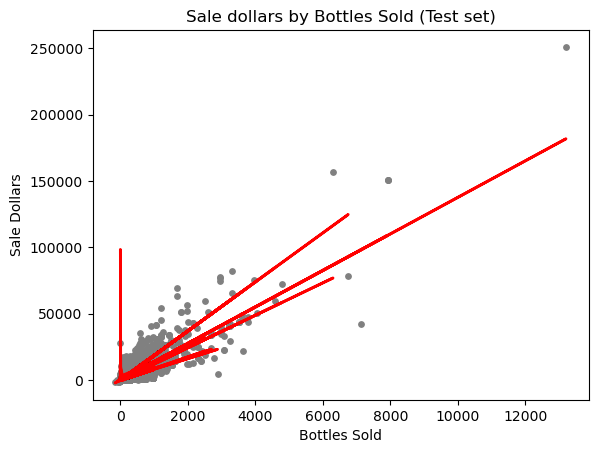

In [18]:
# Showing the regression line from the model on test set (bottles sold)

plot_test = plt
plot_test.scatter(X_test['bottles_sold'], y_test, color='gray', s = 15)
plot_test.plot(X_test['bottles_sold'], y_predicted, color='red', linewidth =2)
plot_test.title('Sale dollars by Bottles Sold (Test set)')
plot_test.xlabel('Bottles Sold')
plot_test.ylabel('Sale Dollars')
plot_test.show()

OBSERVATION 

Naturally, the more bottles sold, the greater the sale dollars. This line is affected by the outliers; however, not so much that the prediction would change by a lot with the outliers removed (sell more product, get more dollars). However, I will be looking at it with outliers removed.

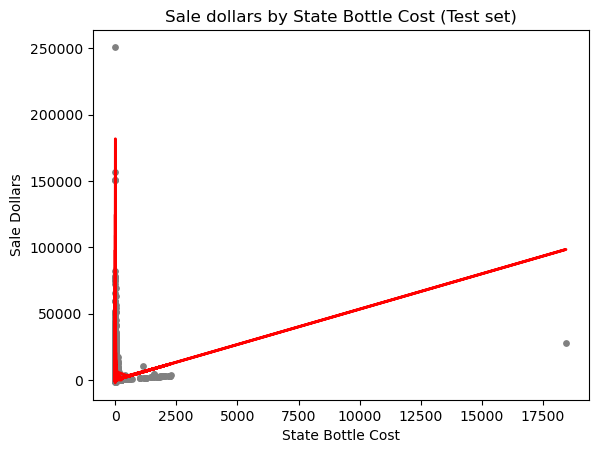

In [19]:
# Showing the regression line from the model on test set ()

plot_test = plt
plot_test.scatter(X_test['state_bottle_cost'], y_test, color='gray', s = 15)
plot_test.plot(X_test['state_bottle_cost'], y_predicted, color='red', linewidth =2)
plot_test.title('Sale dollars by State Bottle Cost (Test set)')
plot_test.xlabel('State Bottle Cost')
plot_test.ylabel('Sale Dollars')
plot_test.show()

OBSERVATION 

While sale dollars obviously go up when a bottle costs more (that outrageously priced bottle of Scotch, for example), sale dollars go HIGHER with the more affordably priced offerings. This aligns with standard economics (most people can't afford bottles of alcohol that cost 27k), where sales are highest (smaller counties), and how much alcohol people are usually buying (not in bulk quantities of thousands of bottles). The largest market is the one buying what most people would consider "standard" alcohol. 

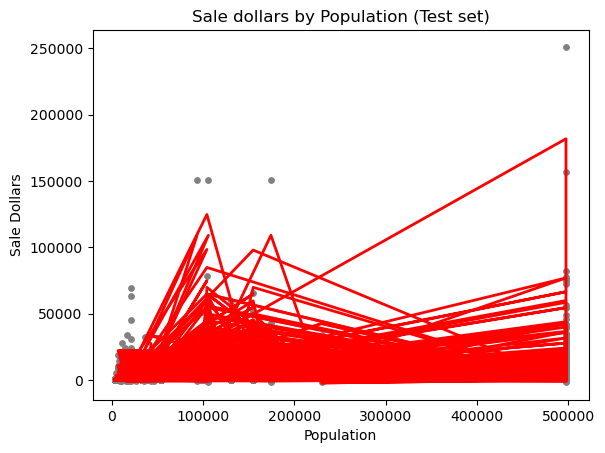

In [20]:
# Showing the regression line from the model on test set (population)

plot_test = plt
plot_test.scatter(X_test['population'], y_test, color='gray', s = 15)
plot_test.plot(X_test['population'], y_predicted, color='red', linewidth =2)
plot_test.title('Sale dollars by Population (Test set)')
plot_test.xlabel('Population')
plot_test.ylabel('Sale Dollars')
plot_test.show()

OBSERVATION

I remain sure that sale dollars and population are not tied together, because this graph does not entirely look like it knows what it wants to do. 

In [24]:
# Removing datapoints outside 3 standard deviations

standard_deviations = 3
LDC_inliers = LDC_numerical[LDC_numerical.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)]

In [25]:
LDC_inliers.shape

(11918087, 12)

In [26]:
# Setting up data for regression with inliers only

# Creating feature variables

X = LDC_inliers.drop('sale_dollars',axis= 1)
y = LDC_inliers['sale_dollars']

In [27]:
# Creating training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [28]:
# Creating regression object

regression = LinearRegression()

In [29]:
# Fitting the regression object onto training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [31]:
rmse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Slope: [-1.43286552e+00 -2.31186612e-01 -1.57045225e-03  8.91372928e-06
 -4.89348823e-01 -4.38714189e-02  1.22471144e+00  5.60250414e+00
  7.20727391e+00 -1.49172597e+02  5.93177198e+02]
Mean squared error:  5220.60132004619
Mean absolute error:  36.51029141279258
R2 score:  0.7736511666945675


Slope for each column:  
'latitude' = -1.43286552e+00                  ((NET CHANGE: +2))       
'longitude' = -2.31186612e-01                 ((NET CHANGE: 0))      
'county_fips' = -1.57045225e-03               ((NET CHANGE: 0))        
'population' = 8.91372928e-06                 ((NET CHANGE: +5))     
'pack' = -4.89348823e-01                      ((NET CHANGE: +2))      
'bottle_volume_ml' = -4.38714189e-02          ((NET CHANGE +0.1))      
'state_bottle_cost' = 1.22471144e+00          ((NET CHANGE +7))      
'state_bottle_retail' = 5.60250414e+00        ((NET CHANGE +1.6))      
'bottles_sold' = 7.20727391e+00               ((NET CHANGE +1.2))      
'volume_sold_liters' = -1.49172597e+02        ((NET CHANGE +8.1))       
'volume_sold_gallons' = 5.93177198e+02        ((NET CHANGE +2.1))   

MSE net change: -66,950   
MAE net change: -28.2   
R2 score net change: +.02   

OBSERVATIONS PRIOR TO GRAPHING   
The MSE and MAE got much closer to where they should ideally be with outliers removed. The R2 didn't change much but it was already in a decent place. 

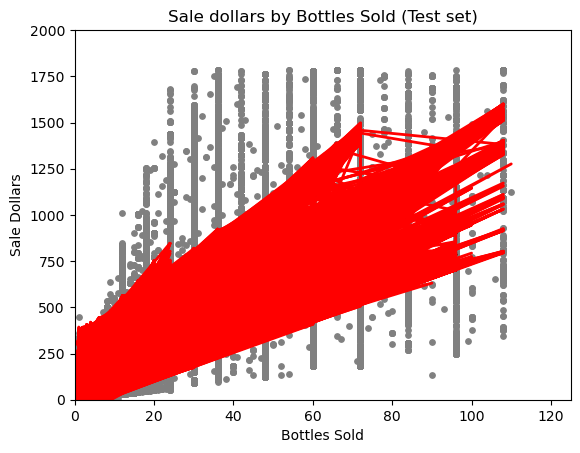

In [35]:
# Showing the regression line from the model on test set (bottles sold), set to focus on positive numbers (ie, excluding the negative sale dollars)

plot_test = plt
plot_test.scatter(X_test['bottles_sold'], y_test, color='gray', s = 15)
plot_test.plot(X_test['bottles_sold'], y_predicted, color='red', linewidth =2)
plot_test.title('Sale dollars by Bottles Sold (Test set)')
plot_test.xlabel('Bottles Sold')
plot_test.ylabel('Sale Dollars')
plot_test.xlim(0,125)
plot_test.ylim(0,2000)
plot_test.show()

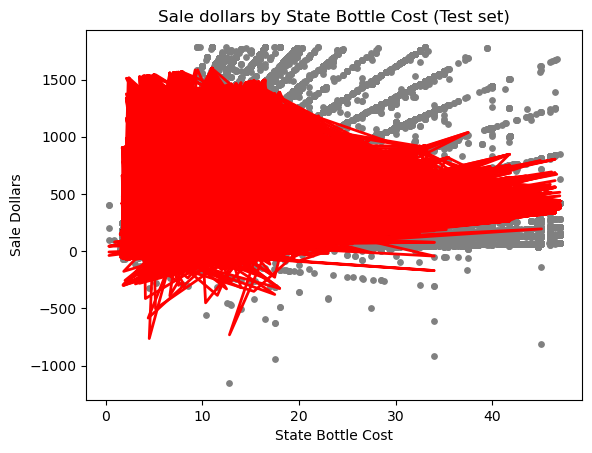

In [34]:
# Showing the regression line from the model on test set ()

plot_test = plt
plot_test.scatter(X_test['state_bottle_cost'], y_test, color='gray', s = 15)
plot_test.plot(X_test['state_bottle_cost'], y_predicted, color='red', linewidth =2)
plot_test.title('Sale dollars by State Bottle Cost (Test set)')
plot_test.xlabel('State Bottle Cost')
plot_test.ylabel('Sale Dollars')
plot_test.show()

OBSERVATION   
While my scores got better (which made me think perhaps the model would fit better), removing the outliers completely changed how my data graphed. I think trying to force the model with inliers only is not the best way to go here. 